<a href="https://colab.research.google.com/github/MN1973/DataScienceProject/blob/main/3a_Subjectlines_Naive_Bayes_UV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import pickle
import bz2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Mandar/Project/"
infile = open(DATA_PATH+'/9M.pkl','rb')
df = pickle.load(infile)

In [ ]:
df.shape

(9569374, 988)

In [ ]:
df.columns

Index(['login_freq_in_OND21', 'age_breaks', 'account_agebreaks', 'subject',
       'sub_length', 'sub_no_of_words', 'percentage_used', 'sender_name_brand',
       'sender_name_rediff', 'sender_name_person',
       ...
       'worth', 'would', 'write', 'x', 'yamuna', 'year', 'yeoor', 'yet', 'yr',
       'zero'],
      dtype='object', length=988)

In [ ]:
df.loc[df['nl_open'] < 0, 'nl_open'] = 0
df.loc[df['nl_open'] > 0, 'nl_open'] = 1

In [ ]:
Y = df['nl_open']

In [ ]:
Y.value_counts()

0    9273287
1     296087
Name: nl_open, dtype: int64

In [ ]:
colname = df.columns[3]
print(colname)

subject


In [ ]:
X = df.iloc[:, np.r_[6,7,10,16:30,38:49]]
X1 = df.iloc[:, np.r_[6,7,10,16:30,38:988]]

In [ ]:
feature_cols = list(X)
print(feature_cols)

['percentage_used', 'sender_name_brand', 'sender_name_others', 'is_male', 'automobile', 'bfsi_business_loan', 'bfsi_credit_cards', 'bfsi_equity', 'bfsi_fixed_deposit', 'bfsi_health_ins', 'bfsi_motor_ins', 'bfsi_mutual_funds', 'bfsi_personal_loan', 'bfsi_term_ins', 'education', 'health', 'real_estate', 'upto19yrs', '20to24yrs', '25to34yrs', '35to44yrs', '45to54yrs', '55+yrs', 'accupto2', 'acc3to5yrs', 'acc6to10yrs', 'acc11to15yrs', 'acc15+yrs']


Without Tokens

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
print(X_train.shape,X_test.shape)

(6698561, 28) (2870813, 28)


In [ ]:
print(y_train.shape,y_test.shape)

(6698561,) (2870813,)


In [ ]:
# Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# training the model on training set

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 93.72951146591575


In [ ]:
# print the confusion matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred)
print(cm_gnb)

[[2685372   96967]
 [  83047    5427]]


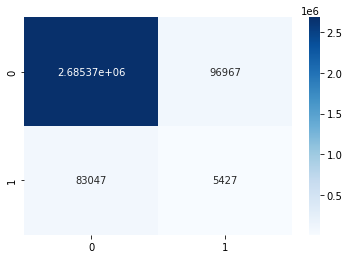

In [ ]:
import seaborn as sns
sns.heatmap(cm_gnb, annot=True, cmap='Blues',fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97   2782339
           1       0.05      0.06      0.06     88474

    accuracy                           0.94   2870813
   macro avg       0.51      0.51      0.51   2870813
weighted avg       0.94      0.94      0.94   2870813



In [ ]:
# Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=True)
bnb.fit(X_train, y_train)

 # making predictions on the testing set
y_pred = bnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Bernoulli Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Bernoulli Naive Bayes model accuracy(in %): 96.9181552403448


In [ ]:
# print the confusion matrix
cm_bnb = metrics.confusion_matrix(y_test, y_pred)
print(cm_bnb)

[[2782339       0]
 [  88474       0]]


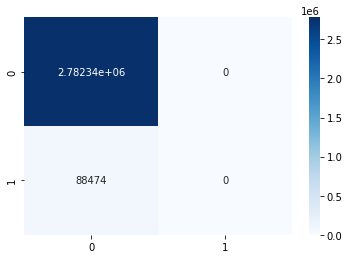

In [ ]:
import seaborn as sns
sns.heatmap(cm_bnb, annot=True, cmap='Blues',fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98   2782339
           1       0.00      0.00      0.00     88474

    accuracy                           0.97   2870813
   macro avg       0.48      0.50      0.49   2870813
weighted avg       0.94      0.97      0.95   2870813



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Multinomial Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb = MultinomialNB(alpha=1.0, class_prior=[0.25, 0.75], fit_prior=True)
mnb.fit(X_train, y_train)
mnb.class_prior

#making predictions on the testing set
y_pred = mnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Multinomial Naive Bayes model accuracy(in %): 3.081844759655192


In [ ]:
y_test.value_counts()

0    2782339
1      88474
Name: nl_open, dtype: int64

In [ ]:
# print the confusion matrix
cm_mnb = metrics.confusion_matrix(y_test, y_pred)
print(cm_mnb)

[[      0 2782339]
 [      0   88474]]


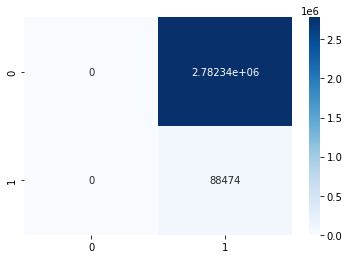

In [ ]:
import seaborn as sns
sns.heatmap(cm_mnb, annot=True, cmap='Blues',fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00   2782339
           1       0.03      1.00      0.06     88474

    accuracy                           0.03   2870813
   macro avg       0.02      0.50      0.03   2870813
weighted avg       0.00      0.03      0.00   2870813



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Categorical Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# training the model on training set

cnb = CategoricalNB()
cnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = cnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Categorical Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Categorical Naive Bayes model accuracy(in %): 96.9181552403448


In [ ]:
# print the confusion matrix
cm_cnb = metrics.confusion_matrix(y_test, y_pred)
print(cm_cnb)

[[2782339       0]
 [  88474       0]]


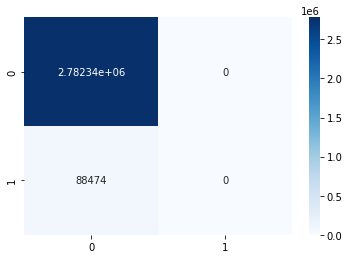

In [ ]:
import seaborn as sns
sns.heatmap(cm_cnb, annot=True, cmap='Blues',fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98   2782339
           1       0.00      0.00      0.00     88474

    accuracy                           0.97   2870813
   macro avg       0.48      0.50      0.49   2870813
weighted avg       0.94      0.97      0.95   2870813



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
